## Linear Regression

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

### mean square error

In [3]:
##### we use MSE to see how this model is performing

def meanSquareError(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

#### simple linear regression

In [4]:
#### we will try simple linear regression first
#### maybe we will do a mutiple linear regression later
#### simple linear regression only accepts 1 dependent variable and 1 independent variable.

class SimpleLinearRegression:
    
    def __init__(self, step_size=0.01, epoch=10000):
        self.step_size = step_size
        self.epoch = epoch
        self.w = None
        self.b = None
        self.epoch = epoch
        # for visualization purpose
        self.loss_history = np.zeros(self.epoch)
        
    def fit(self, X, y):
        # setting basic parameters
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        ########### STOCHASTIC GRADIENT DESCENT ################
        
        #### i have not chek it yet
        #### hopefully it will work
        #### anyways i will come back to this later
        
        for i in range(self.epoch):
            random_index = np.random.randint(0, n_samples)
            Xi = X[random_index, :].reshape(1, X.shape[1])
            yi = y[random_index].reshape(1, 1)
            
            # calculate derivatives w.r.t w and b
            y_pred = np.dot(Xi, self.w) + self.b

            w_deriv = (1 / n_samples) * np.dot(Xi.T, (y_pred - yi))
            b_deriv = (1 / n_samples) * np.sum(y_pred - yi)

            # store loss
            loss = (1 / (2 * n_samples)) * np.sum(np.square(y_pred - yi))
            self.loss_history[i] = loss 
            
            # update weights and bias
            self.w -= self.step_size * w_deriv[0]
            self.b -= self.step_size * b_deriv
    
    def predict(self, X):
        return np.dot(X, self.w) + self.b

### generate data

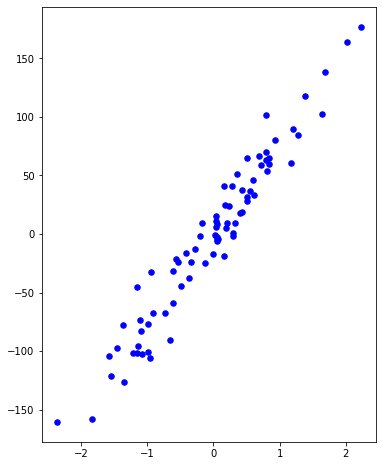

In [5]:
# generate random data for testing
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

fig = plt.figure(figsize=(6, 8))
plt.scatter(X_train[:, 0], y_train, color="b", marker="o", s=30)
plt.show()

### implementation

In [6]:
regressor = SimpleLinearRegression(step_size=0.01, epoch=30000)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("mean square error:", meanSquareError(y_pred=y_pred, y_true=y_test))

mean square error: 279.507271707119


### visualization

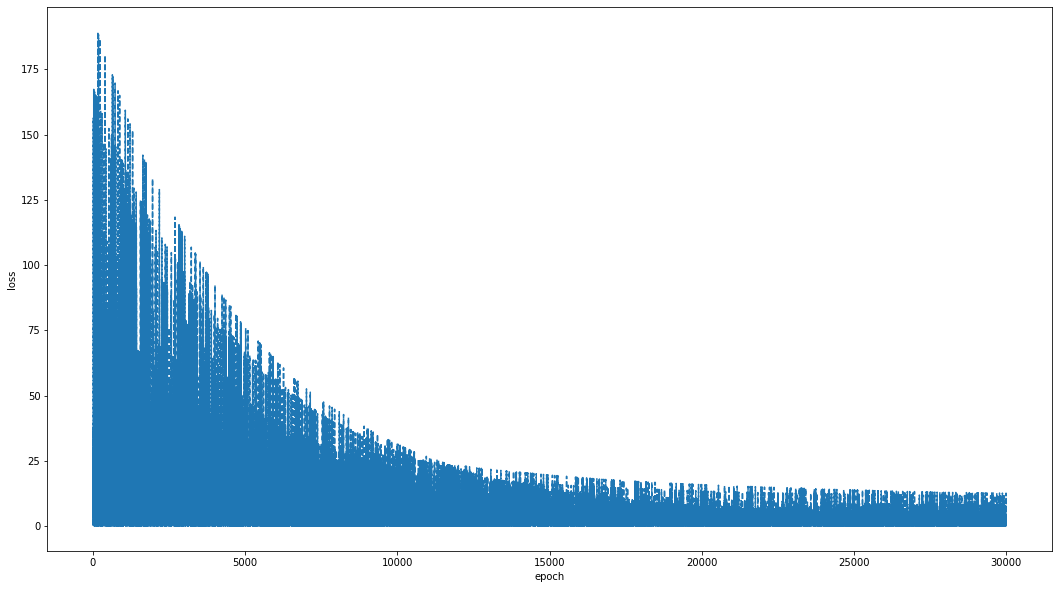

In [7]:
fig = plt.figure(figsize=(18, 10))
epoch_count = np.zeros(regressor.epoch)
for i in range(regressor.epoch):
    epoch_count[i] = i
plt.plot(epoch_count, regressor.loss_history, "--")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

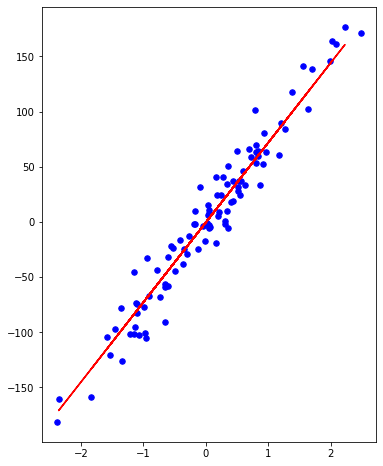

In [8]:
fig = plt.figure(figsize=(6, 8))
plt.scatter(X[:, 0], y, color="b", marker="o", s=30)
plt.plot(X_train, regressor.predict(X_train), color="r")
plt.show()



### i will just leave it for now 
### we will do mutiple linear regression very very soon!!!

### multiple linear regression

In [9]:
## not finished yet
## to be continued....

######### maybe it will work!!!!! ###########

def forwardPropogation(X, w, b):
    #### w --> 1 * n
    #### X --> n * m
    #### b vertor --> [b, b, b, b.....]
    z = np.dot(w, X) + b
    return z

def backwrdPropogation(X, y, z, n):
    z_deriv = (1 / n) * (z - y)
    w_deriv = np.dot(z_deriv, X.T)
    b_deriv = np.sum(z_deriv)
    return w_deriv, b_deriv

def lossFunction(z, y, n):
    loss = (1 / (2 * n)) * np.sum(np.square(z - y))
    return loss

def gradientDescent(w, b, w_deriv, b_deriv, step_size):
    w -= w_deriv * step_size
    b -= b_deriv * step_size
    return w, b

class MultipleLinearRegression:

    def __init__(self, step_size=0.01, epoch=20000):
        self.step_size = step_size
        self.epoch = epoch
        self.w = None
        self.b = None
        self.loss_history = []
        

    def fit(self, X, y):
        # initializing the parameters
        n_samples, n_features = X.shape
        self.w = np.zeros((1, n_features))
        self.b = 0
        n = n_samples
        
        ########### STOCHASTIC GRADIENT DESCENT ################
        for i in range(self.epoch):
            random_index = np.random.randint(0, n_samples)
            Xi = (X[random_index, :].reshape(1, X.shape[1])).T
            yi = np.array(y[random_index].reshape(1, 1))
            
            ### forward propogation
            zi = forwardPropogation(Xi, self.w, self.b)
            
            ### calculate and store loss
            loss = lossFunction(zi, yi, n)
            if i % 10 == 0:
                self.loss_history.append(loss)
            
            ### backward propogation
            w_deriv, b_deriv = backwrdPropogation(Xi, yi, zi, n)
            
            ### update weights and bais
            self.w, self.b = gradientDescent(self.w, self.b, w_deriv, b_deriv, self.step_size)
            


    def predict(self, X):
        X = X.T
        return np.dot(self.w, X) + self.b
        

### generate data

In [101]:
df = pd.read_csv("insurance.csv")
# Generate various summary statistics, excluding NaN values.
def map_smoking(column):
    mapped=[]
    
    for row in column:
        
        if row=="yes":
            mapped.append(1)
        else:
            mapped.append(0)
        
    return mapped
df["smoker_norm"]=map_smoking(df["smoker"])
nonnum_cols=[col for col in df.select_dtypes(include=["object"])]

def map_obese(column):
    mapped=[]
    for row in column:
        if row>30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped
df["obese"]=map_obese(df["bmi"])
print(df.describe())


age          bmi     children       charges  smoker_norm  \
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000   
mean     39.207025    30.663397     1.094918  13270.422265     0.204783   
std      14.049960     6.098187     1.205493  12110.011237     0.403694   
min      18.000000    15.960000     0.000000   1121.873900     0.000000   
25%      27.000000    26.296250     0.000000   4740.287150     0.000000   
50%      39.000000    30.400000     1.000000   9382.033000     0.000000   
75%      51.000000    34.693750     2.000000  16639.912515     0.000000   
max      64.000000    53.130000     5.000000  63770.428010     1.000000   

             obese  
count  1338.000000  
mean      0.526906  
std       0.499462  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000  


### visualization

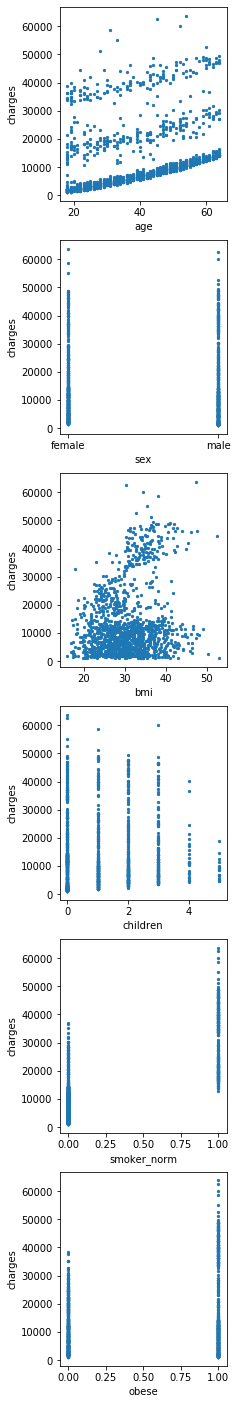

In [103]:
colnum=len(df.columns)-3
fig,ax=plt.subplots(colnum,1,figsize=(3,25))
ax[0].set_ylabel("charges")
p_vals={}
for ind,col in enumerate([i for i in df.columns if i not in ["smoker","region","charges","sex_norm"]]):
    
    ax[ind].scatter(df[col], df.charges,s=5)
    ax[ind].set_xlabel(col)
    ax[ind].set_ylabel("charges")    
plt.show()

In [108]:
nonsense_column = ["charges", "bmi", "smoker", "sex", "region", "children"]
X = np.asarray(df.drop(nonsense_column, axis=1))
Y = np.asarray(df["charges"])

print("X shape:")
print(np.shape(X))
print("Y shape:")
print(np.shape(Y))

# split test train 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 0)
print("shape of feature set")
print(np.shape(X_train))
print("shape of label set")
print(np.shape(y_train))

X shape:
(1338, 3)
Y shape:
(1338,)
shape of feature set
(936, 3)
shape of label set
(936,)


### implementation

In [123]:
multiregressor = MultipleLinearRegression(step_size=0.02, epoch=50000)
multiregressor.fit(X_train, y_train)
y_pred = multiregressor.predict(X_test)
print("mean square error:", meanSquareError(y_pred=y_pred, y_true=y_test))

mean square error: 109056121.07939777


### visualization

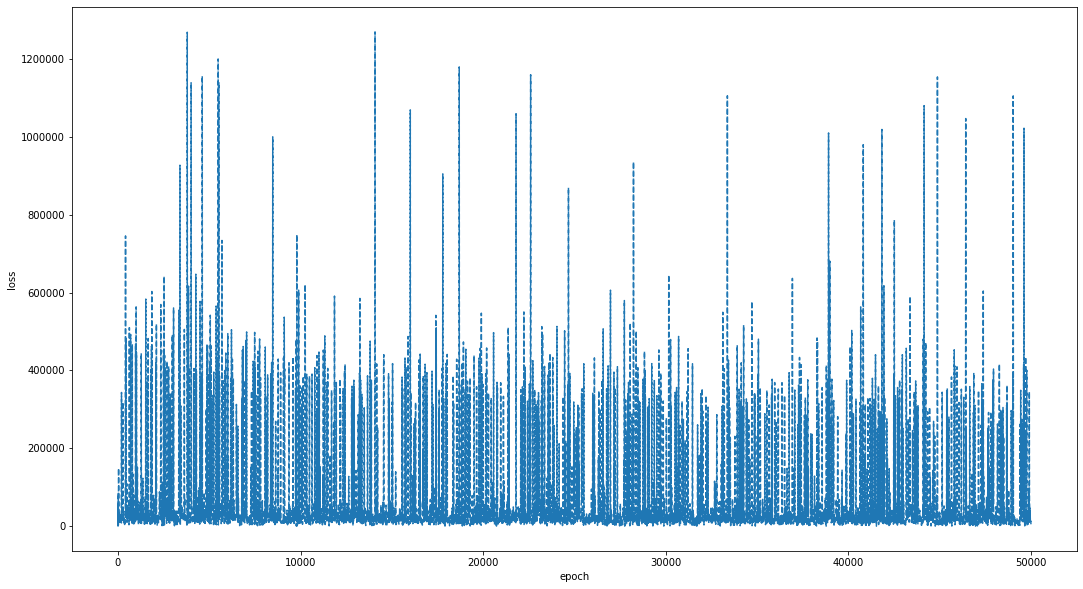

In [124]:
fig = plt.figure(figsize=(18, 10))
epoch_count = []
for i in range(multiregressor.epoch):
    if i % 10 == 0:
        epoch_count.append(i)
plt.plot(epoch_count, multiregressor.loss_history, "--")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

Actual     Predicted
0   9724.53000  16903.528513
1   8547.69130  14365.930361
2  45702.02235  19548.898115
3  12950.07120  19581.526643
4   9644.25250  15556.151752


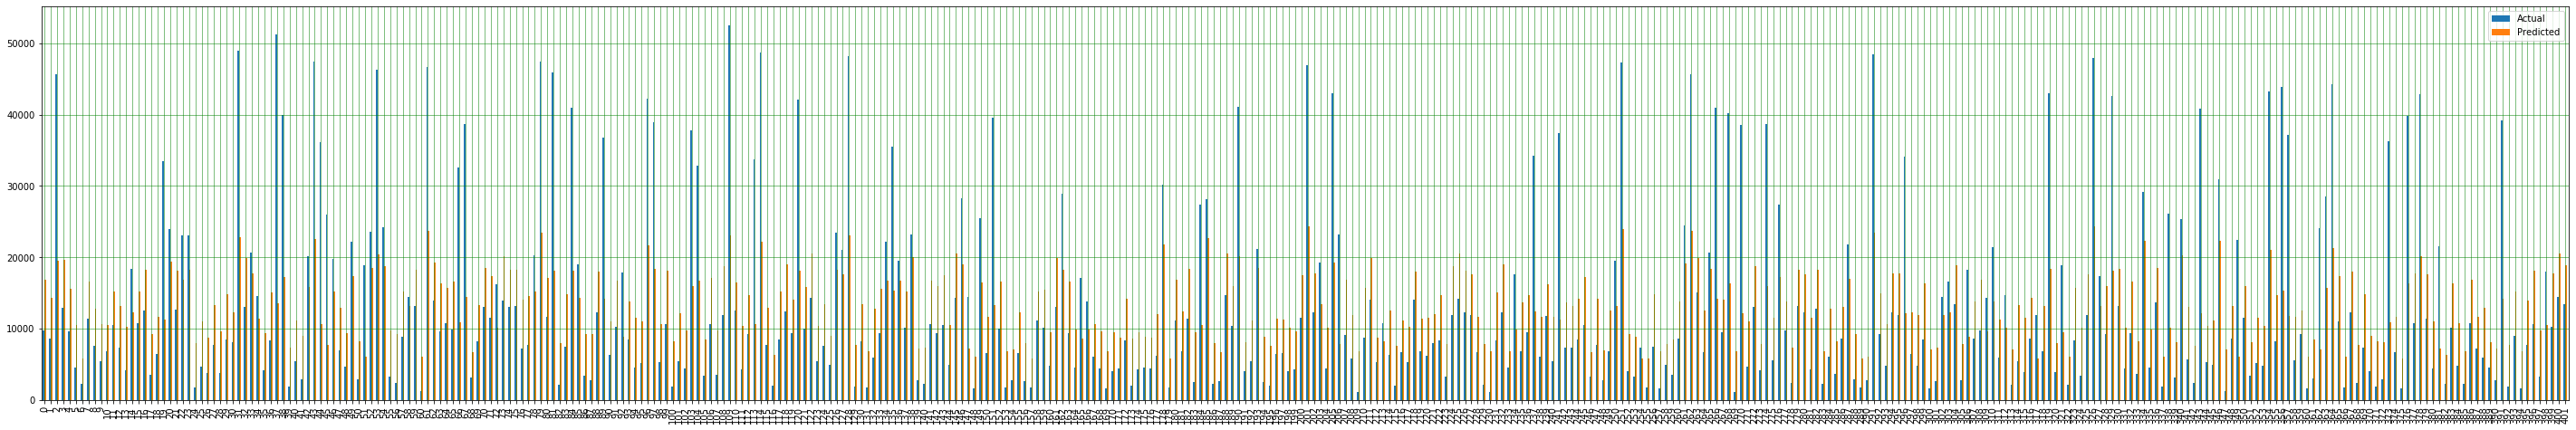

Root Mean Square Error 
 10442.993875292552
R^2 Value: 
 0.3161316431051717


In [125]:
#print out the actual value and predict value
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred[0]})
print(df.head())
df.plot(kind='bar',figsize=(50,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

rmse = np.sqrt(mean_squared_error(y_test, y_pred[0]))      
r2_value = r2_score(y_test, y_pred[0])

print("Root Mean Square Error \n", rmse)
print("R^2 Value: \n", r2_value)